## Pretty plots: Formatting, subplots, and seaborn

An attractive, well-laid-out plot is worth its weight in cliches.  Compare the following three attempts to plot data on tips given to servers from men and women at lunch and dinner.  The goal is to find out generally who tips more and what mealtime generates bigger tips.  Don't worry about the code for now, we'll get to that in a minute.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Loading an example dataset provided by the seaborn package.
tips = sns.load_dataset("tips")
print(tips.head(n=4))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2


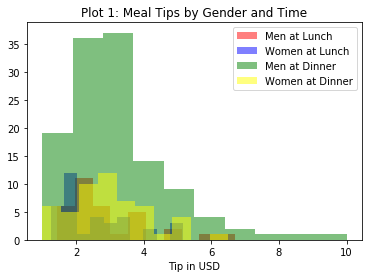

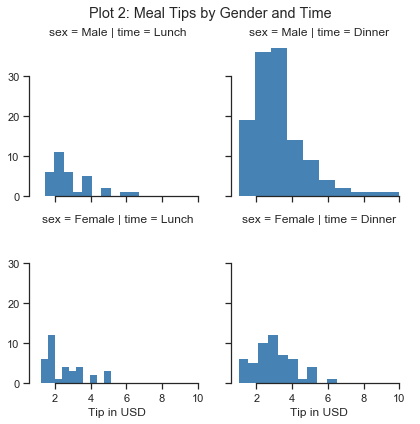

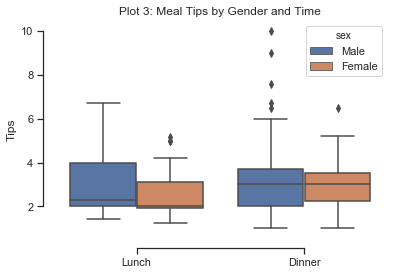

In [2]:
# Creating variables for each of the four conditions to graph using the basic
# matplotlib functionality.
menlunchtip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Lunch')]['tip']
womenlunchtip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Lunch')]['tip']
mendinnertip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Dinner')]['tip']
womendinnertip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Dinner')]['tip']

# Making overlapping histograms.
plt.hist(menlunchtip, color='red',  alpha=.5,label='Men at Lunch')  # alpha just controls the opacity
plt.hist(womenlunchtip, color='blue', alpha=.5,label='Women at Lunch')
plt.hist(mendinnertip, color='green', alpha=.5,label='Men at Dinner')  
plt.hist(womendinnertip, color='yellow', alpha=.5,label='Women at Dinner')
plt.xlabel('Tip in USD')
plt.legend(loc='upper right')
plt.title('Plot 1: Meal Tips by Gender and Time')
plt.show()

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(tips, row="sex", col="time")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "tip", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Tip in USD')
plt.suptitle('Plot 2: Meal Tips by Gender and Time')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

# Comparing groups using boxplots.
ax = sns.boxplot(x='time',y='tip',hue='sex',data=tips)  
plt.title('Plot 3: Meal Tips by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

Of the three plots showing tips at lunch and dinner by men and women, Plot 1 is basically useless.  The bars overlap so much that it isn't possible to see what is happening in the blue and red groups at all.  All we can know for sure is that there is more data in the men at dinner group, that no one in the sample gave a tip of 0, and that the highest tip was 10.

Plot 2 is better.  It contains all of the information from Plot 1, but separates the groups into subplots so we can actually see them.  All four subplots are scaled so that they have the same x-axis, ranging from 0 to 40, and the same y-axis, ranging from 0 to 12.  We see at a glance that most of the data is coming from men at dinner.  With some effort, by comparing subplots we can also see that men appear to tip more than women at both lunch and dinner, and that tips are higher at dinner than at lunch.  

Even this plot can be improved, because it contains a lot of unnecessary information.  Plot 3, on the other hand, has just the information we need most if we want to compare how tipping behavior generally works in each group.  We see at a glance that women tip less at lunch than men, but tip similarly at dinner.  With some effort, we can also see that tipping is higher at dinner.

We can plot the same data to emphasize differences in mealtime:

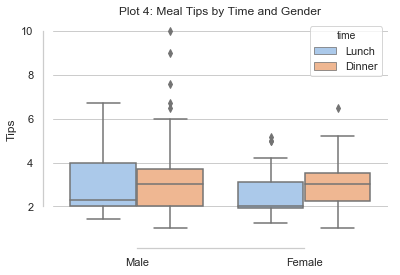

In [3]:
#Comparing groups again, but with a different emphasis.

# Setting the overall aesthetic (includes gridlines).
sns.set(style="whitegrid")

ax = sns.boxplot(x='sex',y='tip',hue='time',data=tips,palette='pastel')  

plt.title('Plot 4: Meal Tips by Time and Gender')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

Here it is obvious that dinner generates higher tips than lunch, and that this is true for both men and women.  It is harder to see whether men or women tip more on average.  

Plots 3 and 4 are equally good, but they emphasize different things.  Let your question guide your plot choices.


### Thinking Like a Data Scientist
As a general rule of thumb, a plot that requires someone to think hard to understand it is a bad plot.  When you're nose-deep in data every plot you make will be easy for you to understand, so make sure to show your plots to someone else and see what they say.  If they don't get it, change it!  As in writing, so in plotting: [Kill your darlings](http://thewritepractice.com/kill-your-darlings/).


## Seaborn

If you remember the plots we made in the prep course, you may be thinking that the ones you see here are a lot more attractive.  With the exception of Plot 1, these were made using the Python package [Seaborn](http://seaborn.pydata.org/).  Built on top of matplotlib, Seaborn is more powerful, more flexible, and has much nicer default options.  Now that you are more comfortable with Python, we recommend moving your plotting to Seaborn.  [This example gallery](http://seaborn.pydata.org/examples/) will give you a sense of what you can do.  You can install seaborn with `pip install seaborn` and import it once installed with `import seaborn as sns`, as we did above.

Here's some other ways of visualizing the tips data, courtesy of Seaborn:


### Bar Plot

Barplots are the most commonly used method for visualizing grouped data. Bar plots often show the mean (though they are also often used for counts), sometimes with an error bar representing some measure of variance. Below, we use the 95% confidence interval.

Barplots are also called 'dynamite plots' because each bar with its error resembles a stick of dynamite.


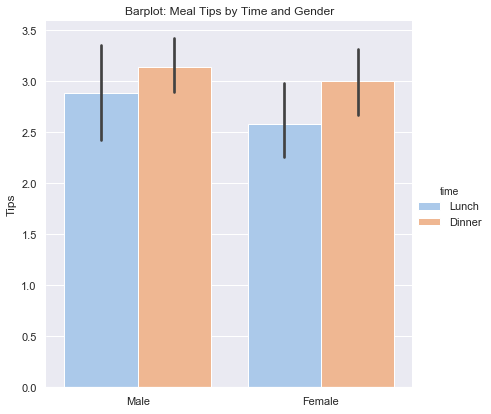

In [4]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.catplot(x='sex', y='tip', hue='time', data=tips,
                   height=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Barplot: Meal Tips by Time and Gender')
plt.show()

While barplots are common, people also object to them for two reasons.  The first is that they are inefficient: the space between 0.0 and 2.0 is wasted.  Yet because the height of the bars is what conveys size, the bar _has_ to start at 0.  The second is that they can be misleading, because the brain looks at the difference between the groups relative to the total height of the bars.  A difference of two points can look much more exciting on bars with a maximum height of 4 rather than a maximum height of 20.  This is a problem because group differences should be evaluated based on the size of the error bars, not the height of the bars itself.  Look at some [bad barplots in real life.](https://www.washingtonpost.com/graphics/politics/2016-election/trump-charts/)

People who dislike dynamite plots recommend boxplots or pointplots instead.  However, in business barplots are still very common and expected.


### Pointplot

A pointplot has all the strengths of a barplot without many of its weaknesses.  Pointplots use much less space to convey the same information, and the difference in size between the groups is rightly compared to the size of the error bars.

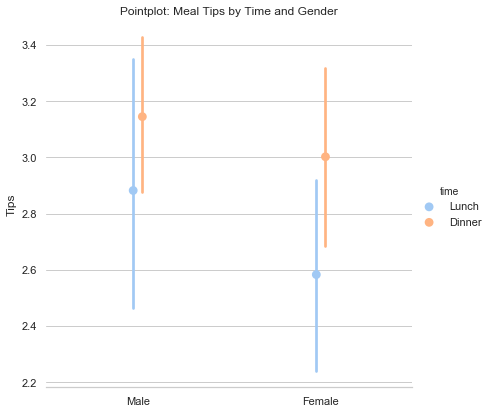

In [7]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.catplot(x="sex", y="tip", hue="time", data=tips,
                   height=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Pointplot: Meal Tips by Time and Gender')
plt.show()


## Visualizing Two Continuous Variables

So far, all these graphs have focused on one continuous variable, tips, and two categorical variables, gender and time.  Visualizing two continuous variables together involves a different type of plot.


### Scatterplot

Scatterplots are bread and butter for a data scientist.  They may appear with or without a 'fit' line that attempts to summarize the relationship between the variables.

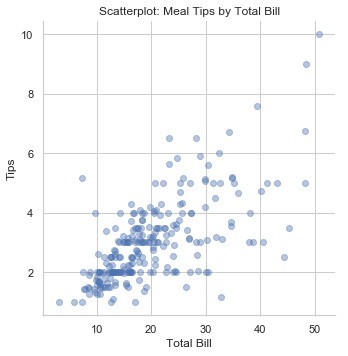

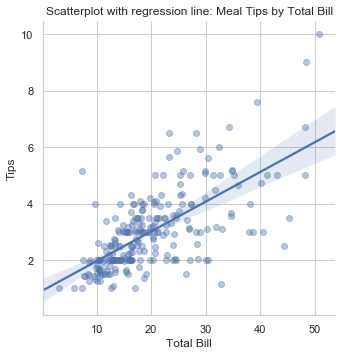

In [7]:
g = sns.lmplot(y='tip', # Variable 1.
               x='total_bill', # Variable 2.
               data=tips, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot: Meal Tips by Total Bill')
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               data=tips, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot with regression line: Meal Tips by Total Bill')
plt.show()

As before, we can split the data and plot by groups.

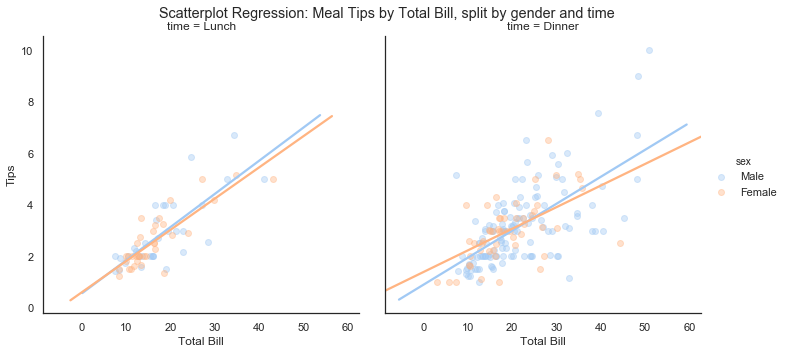

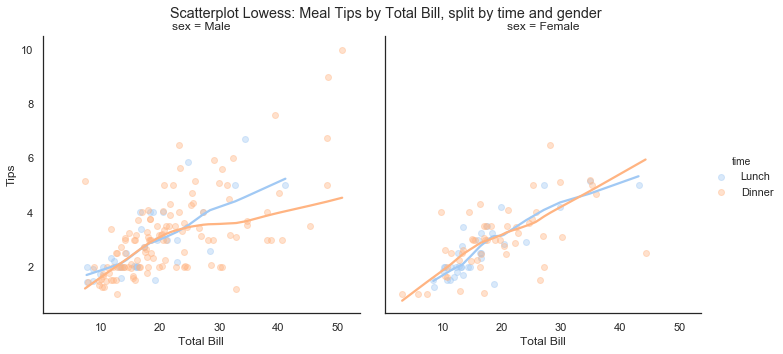

In [10]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='sex',
               data=tips, # Data.
               col='time',
               fit_reg=True,
               ci=False,
               palette = 'pastel',
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='time',
               data=tips, # Data.
               col='sex',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Lowess: Meal Tips by Total Bill, split by time and gender')
plt.subplots_adjust(top=0.9)
plt.show()

## General guidelines

There are many more types of plots, and [an infinite number of ways to combine them](http://flowingdata.com/2017/01/24/one-dataset-visualized-25-ways/).  Seaborn is powerful and flexible, and will probably meet most of your day-to-day plotting needs. [More complex visualizations](http://flowingdata.com/2016/12/29/best-data-visualization-projects-of-2016/) are a specialization within data science that we will touch on towards the end of the course.